### Introduction
https://www.kaggle.com/karangadiya/fifa19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('./dataset/FIFA19/data.csv')

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#subset=['Dribbling', 'SlidingTackle']
#subset=['StandingTackle', 'SlidingTackle']
subset=['StandingTackle', 'LongShots']
subset=['Interceptions', 'LongShots']


In [6]:
df = df.dropna(subset=subset)

In [7]:
X1 = df[subset[0]]
X2 = df[subset[1]]
print(X1.count())

18159


In [8]:
len(df) - X1.count()  #https://stackoverflow.com/a/34537085

0

In [9]:
len(df) - X2.count() 

0

In [10]:
X = np.array([X1, X2])

print(np.shape(X))

(2, 18159)


In [11]:
X = X.T
print(np.shape(X))

(18159, 2)


Text(0.5, 0, 'Interceptions')

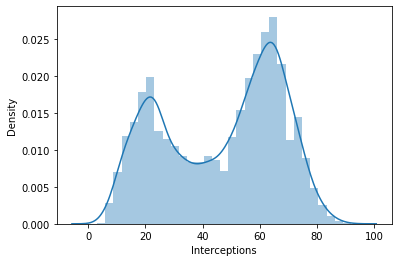

In [12]:
sns.distplot(X[:,0])
plt.xlabel(subset[0])

Text(0.5, 0, 'LongShots')

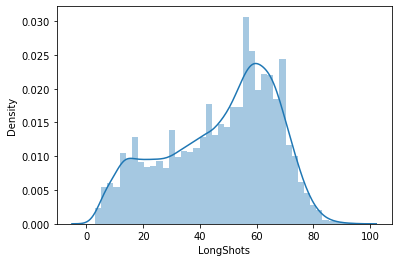

In [13]:
sns.distplot(X[:,1])
plt.xlabel(subset[1])

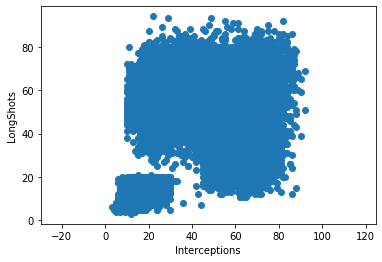

In [14]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.xlabel(subset[0])
plt.ylabel(subset[1])
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)

In [17]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

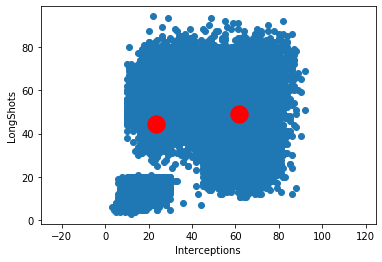

In [18]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.xlabel(subset[0])
plt.ylabel(subset[1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

In [19]:
init = np.array([[0,0],
                     [100,100]],
                    np.float64)

In [20]:
kmeans = KMeans(n_clusters=2, init=init, max_iter=100, n_init=10, random_state=0)


In [21]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[  0.,   0.],
       [100., 100.]]), max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

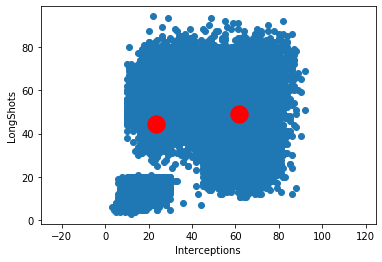

In [22]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.xlabel(subset[0])
plt.ylabel(subset[1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')